## Assignment: Predator-prey dynamics (Simulations in the Natural Sciences)

Exploring different numerical ODE solvers.

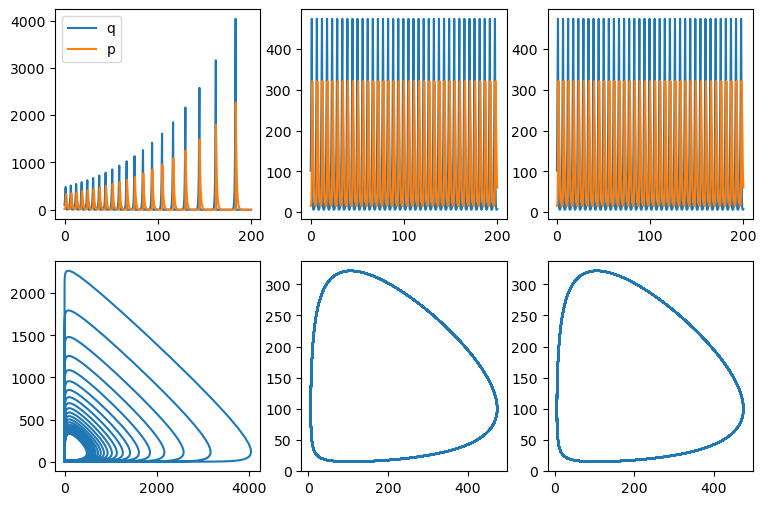

In [16]:
#!/usr/bin/env python3
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#runge kutta 4th order
def RK4(yn, tn, f_x, h):
    k1 = f_x(tn, yn)
    k2 = f_x(tn + h/2.0, yn + (h/2.0)*k1)
    k3 = f_x(tn + h/2.0, yn + (h/2.0)*k2)
    k4 = f_x(tn + h, yn + h*k3)
    return yn + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)

#midpoint runge kutta
def midpointRK(yn, tn, f_x, h):
    k1 = f_x(tn, yn)
    k2 = f_x(tn + h/2.0, yn + (h/2.0)*k1)
    return yn + h * k2

#euler method
def Euler(yn,tn,f_x, h):
    return yn + h * f_x(tn, yn)

#lotka volterra ODE
def LotkaVolterra(t, y):
    M, F = y
    dMdt = km * M - kmf * M * F
    dFdt = -kf * F + kfm * M * F
    return np.array([dMdt, dFdt])

#ODE solver
def ODESolver(t0, y0, method, function, h, nsteps):
    yn = y0
    tn = t0
    ylist = []
    tlist = []
    for n in range(nsteps):
        yn1 = method(yn, tn, function, h)
        tn += h
        tlist.append(tn)
        ylist.append(yn1)
        yn = yn1
    return(tlist, np.array(ylist))

km  = 2.0 # prey growth rate
kmf = 0.02 # predation rate
kf  = 1.06 # predator death rate
kfm = 0.01 # predator reproduction rate (for every prey eaten)


t0 = 0
y0 = np.array([100,15]) # initial state
h = 0.01
nsteps = 20000

t, y = ODESolver(t0, y0, Euler, LotkaVolterra, h, nsteps)
t2, y2 = ODESolver(t0, y0, midpointRK, LotkaVolterra, h, nsteps)
t3, y3 = ODESolver(t0, y0, RK4, LotkaVolterra, h, nsteps)
fig, ax = plt.subplots(2,3, figsize = (9,6))

ax[0,0].plot(t,y[:,0],label="q")
ax[0,0].plot(t,y[:,1],label="p")

ax[0,1].plot(t2,y2[:,0],label="q")
ax[0,1].plot(t2,y2[:,1],label="p")

ax[0,2].plot(t3,y3[:,0],label="q")
ax[0,2].plot(t3,y3[:,1],label="p")
ax[0,0].legend()

ax[1,0].plot(y[:,0],y[:,1])
ax[1,1].plot(y2[:,0], y2[:,1])
ax[1,2].plot(y3[:,0], y3[:,1])

plt.show()
# plt.savefig('lotka_volterra_methods.png',bbox_inches='tight',dpi=350)

### Try initial conditions that are closer to/further from the fixed point (106,100)

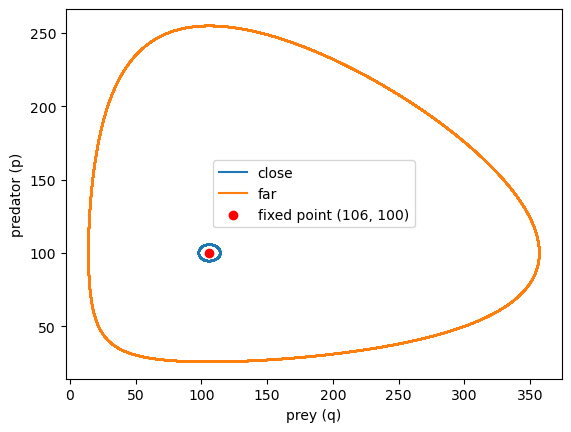

In [29]:
t0 = 0
# close to fixed point
y0_close = np.array([110, 105])
# far from fixed point
y0_far = np.array([300, 50])
h = 0.01
nsteps = 20000

t_close, y_close = ODESolver(t0, y0_close, RK4, LotkaVolterra, h, nsteps)
t_far, y_far = ODESolver(t0, y0_far, RK4, LotkaVolterra, h, nsteps)

plt.figure()
plt.plot(y_close[:,0], y_close[:,1], label="close")
plt.plot(y_far[:,0], y_far[:,1], label="far")
plt.scatter(106, 100, color='red', marker='o', label="fixed point (106, 100)")
plt.xlabel("prey (q)")
plt.ylabel("predator (p)")
plt.legend()
plt.show()

### Check larger timestep

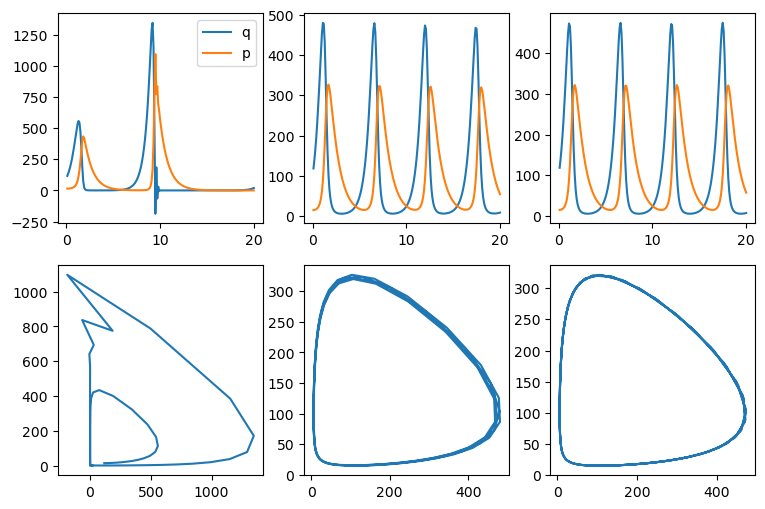

In [41]:
h = 0.1
nsteps = 200 # reduced because of runtime warning (overflow)

t, y = ODESolver(t0, y0, Euler, LotkaVolterra, h, nsteps)
t2, y2 = ODESolver(t0, y0, midpointRK, LotkaVolterra, h, nsteps)
t3, y3 = ODESolver(t0, y0, RK4, LotkaVolterra, h, nsteps)
fig, ax = plt.subplots(2,3, figsize = (9,6))

ax[0,0].plot(t,y[:,0],label="q")
ax[0,0].plot(t,y[:,1],label="p")

ax[0,1].plot(t2,y2[:,0],label="q")
ax[0,1].plot(t2,y2[:,1],label="p")

ax[0,2].plot(t3,y3[:,0],label="q")
ax[0,2].plot(t3,y3[:,1],label="p")
ax[0,0].legend()

ax[1,0].plot(y[:,0],y[:,1])
ax[1,1].plot(y2[:,0], y2[:,1])
ax[1,2].plot(y3[:,0], y3[:,1])

plt.show()